## Name: Chinedu Onyeka
### DATA 1200: Assignment 1

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# read the dataset
housing = pd.read_csv("HousingNew.csv")
housing.head()

,ID,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom,fullbase,airco
0,1,42000.0,5850,3,1,2,1,no,yes,no
1,2,38500.0,4000,2,1,1,0,no,no,no
2,3,49500.0,3060,3,1,1,0,no,no,no
3,4,60500.0,6650,3,1,2,0,yes,no,no
4,5,61000.0,6360,2,1,1,0,no,no,no


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        546 non-null    int64  
 1   price     546 non-null    float64
 2   lotsize   546 non-null    int64  
 3   bedrooms  546 non-null    int64  
 4   bathrms   546 non-null    int64  
 5   stories   546 non-null    int64  
 6   garagepl  546 non-null    int64  
 7   recroom   546 non-null    object 
 8   fullbase  546 non-null    object 
 9   airco     546 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 42.8+ KB


In [4]:
# Key statistics
housing.describe()

,ID,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


### Key Insights from the key statistics

1. The mean price in the housing data set is about $68,121.60 and the median price is about 62,000.00
2. The mean lot size is the housing data set is about 5,150.27 while the median lot size is about 4,600
3. The median number of bedrooms is 3
4. The median number of bathroom is 1

Basically, a typical house from the housing data set would be expected to have 3 bedrooms, 1 bathroom, with median price of $62,000 and a lot size of 4,600

### Exploratory Data Analysis

<AxesSubplot:>

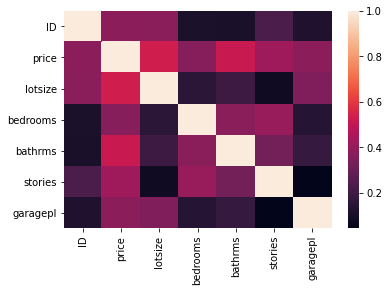

In [5]:
# heatmap
sns.heatmap(housing.corr())

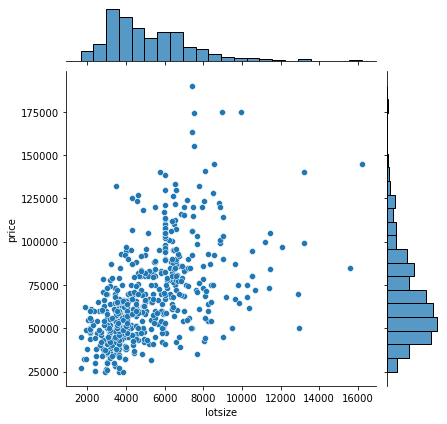

In [6]:
# joint plot
sns.jointplot(x = "lotsize", y = "price", data=housing)

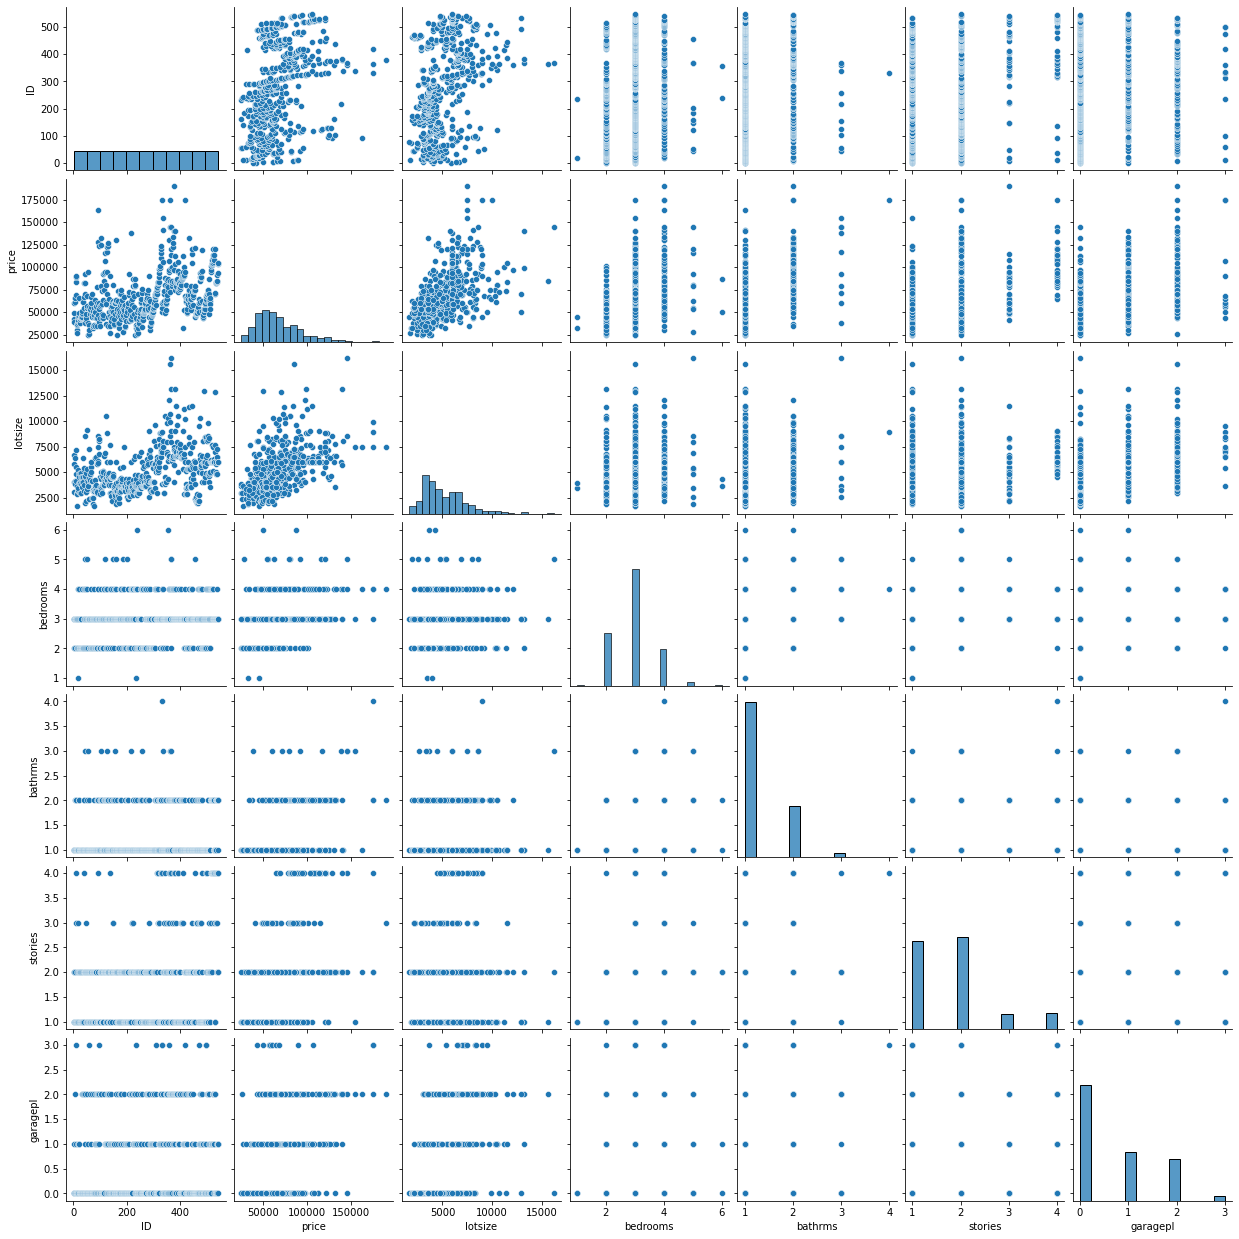

In [7]:
# pairplot
sns.pairplot(housing)

### Training and Testing Data

In [8]:
# Normalize the recroom, fullbase, and airco columns
housing.recroom.replace(('yes', 'no'), (1,0), inplace = True)
housing.fullbase.replace(('yes', 'no'), (1,0), inplace = True)
housing.airco.replace(('yes', 'no'), (1,0), inplace = True)

In [9]:
housing.head()

,ID,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom,fullbase,airco
0,1,42000.0,5850,3,1,2,1,0,1,0
1,2,38500.0,4000,2,1,1,0,0,0,0
2,3,49500.0,3060,3,1,1,0,0,0,0
3,4,60500.0,6650,3,1,2,0,1,0,0
4,5,61000.0,6360,2,1,1,0,0,0,0


In [10]:
y = housing["price"]
X = housing[["lotsize", "bedrooms", "bathrms", "stories", "garagepl", "recroom", "fullbase", "airco"]]

In [11]:
# Split the dataset into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create the model

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Predict the data

Text(0, 0.5, 'Predicted Y values')

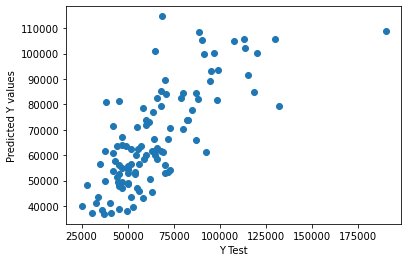

In [13]:
predictions = lm.predict(X_test)
# Plot a scatter plot of the predicted y values vs the y test values
plt.scatter(y_test, predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y values")

### Evaluate the model

In [14]:
# Calculate metrics
print("MAE: ", round(metrics.mean_absolute_error(y_test, predictions),0))
print("MSE: ", round(metrics.mean_squared_error(y_test, predictions),0))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),0))

MAE:  12300.0
MSE:  295973418.0
RMSE:  17204.0


In [15]:
# Print the intercept
print(lm.intercept_)

2319.895392076811


In [16]:
# Show the coefficients of all the features
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
lotsize,4.131434
bedrooms,449.150209
bathrms,13540.497949
stories,8105.660678
garagepl,5442.358797
recroom,5280.756748
fullbase,8552.135889
airco,11708.323324


### Residuals

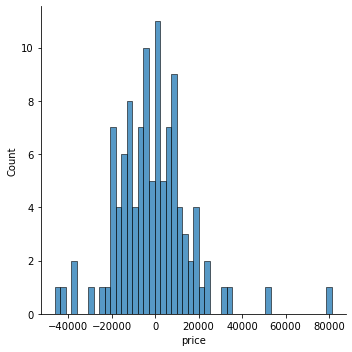

In [17]:
sns.displot((y_test-predictions), bins=50)